# Second order differential equations using neural networks

Importing packages

In [55]:
import autograd.numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from autograd import grad,jacobian,elementwise_grad

Creating Neural Network Architecture

In [142]:
def sig(x):
    return 1. / (1. + np.exp(-x))

def neuron(W, x):
    a1 = sig(np.dot(x, W[0]))
    return np.dot(a1, W[1])


Derivative function of the neuron

In [143]:
def neuron_x(x):
    a1 = sig(np.dot(x, W[0]))
    return np.dot(a1, W[1])

Let us take the following problem :
![17](images/17.png)
with
![18](images/18.png)
The trial neural form of the problem is :
![19](images/20.png)
The analytical solution of the problem is :
![20](images/19.png)

In [144]:
def psi_trial(xi, net_out):
    return xi + xi**2 * net_out

psy_grad = grad(psy_trial)
psy_grad2 = grad(psy_grad)

The second order derivative is given by :
![21](images/21.png)

In [145]:
def f(xi,psi,dpsi):
    return (-1./5.)*np.exp(-xi/5.)*np.cos(x)-(1./5.)*psi-psi

A function for the analytical solution :

In [146]:
def Analytical(x):
    return np.exp(-x/5.)*np.sin(x)

Let's create a loss function

In [147]:
def loss_function(W, x):
    loss_sum = 0.
    
    for xi in x:
        net_out = neuron(W, xi)[0][0]

        net_out_d = grad(neuron_x)(xi)
        net_out_dd = grad(grad(neuron_x))(xi)
        
        psy_t = psy_trial(xi, net_out)
        
        gradient_of_trial = psy_grad(xi, net_out)
        second_gradient_of_trial = psy_grad2(xi, net_out)
        
        func = f(xi, psy_t, gradient_of_trial) # right part function
        
        err_sqr = (second_gradient_of_trial - func)**2
        loss_sum += err_sqr
        
    return loss_sum

Create inputs and weights for the neural net and train it

In [166]:
x=np.linspace(0,2,10)
W = [np.random.randn(1, 10), np.random.randn(10, 1)]
lmb = 0.001

for i in range(50):
    loss_grad =  elementwise_grad(loss_function)(W, x)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

Let's check the accuracy and plot the graph

[ 0.16390251  0.15639242  0.13618379  0.10974806  0.08632391  0.07592042
  0.08710387  0.12501147  0.18999366  0.27716656]


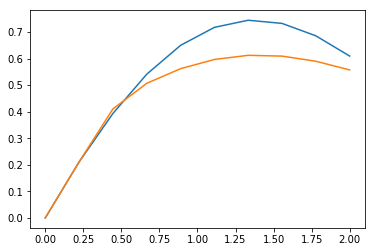

In [165]:
print (loss_function(W, x))
res = [psy_trial(xi, neural_network(W, xi)[0][0]) for xi in x] 
y_space = Analytical(x)

plt.figure()
plt.plot(x, y_space) 
plt.plot(x, res)
plt.show()